# ***Cohor Analysis Online Retail***


# * Import Library

In [1]:
#install.packages("ggplot2")
library(data.table)
library(readxl)
library(dplyr)
library(ggplot2)
library(ggthemes) 



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# * Import Dataset

In [2]:
retail_orginal=fread("../input/online-retail-ii-uci/online_retail_II.csv", sep = ",", header= TRUE)

# * Viewing Data
* Invoice : Invoice number
* StockCode : Product (item) code
* Description : Product (item) name
* Quntity : Product (item) quantity per order
* InvoiceDate : Date/time of invoice
* Price : Unit price
* CustomerID : Customer number




In [3]:
head(retail_orginal)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
<chr>,<chr>,<chr>,<int>,<dttm>,<dbl>,<dbl>,<chr>
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
489434,22041,"RECORD FRAME 7"""" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom


# Ckecking & Preparing Data 
* Remove null value
* Convert data type
* Keep need columns

Count of Null Value in Customer ID column

In [4]:
nrow(retail_orginal[is.na(`Customer ID`)])

[1] 243007

Remove Null value in Customer ID column and Input in new data table 

In [5]:
retail_selected=as.data.table(retail_orginal[!is.na(`Customer ID`)])
nrow(retail_selected[is.na(`Customer ID`)])

[1] 0

# Monthly Cohort
Step 1 : For monthly Cohort analysis we need to recognize and separate new customers per month.so we should sort Invoice by Invoice Date per Customer ID

* selecting culemns importand
* Convert Invoice Date/time to Invoice Date

In [6]:
colnames(retail_selected)

[1] "Invoice"     "StockCode"   "Description" "Quantity"    "InvoiceDate"
[6] "Price"       "Customer ID" "Country"

In [7]:
retail_ColSelected=retail_selected[,c("Invoice","Customer ID","InvoiceDate")]
head(retail_ColSelected,10)

Invoice,Customer ID,InvoiceDate
<chr>,<dbl>,<dttm>
489434,13085,2009-12-01 07:45:00
489434,13085,2009-12-01 07:45:00
489434,13085,2009-12-01 07:45:00
489434,13085,2009-12-01 07:45:00
489434,13085,2009-12-01 07:45:00
489434,13085,2009-12-01 07:45:00
489434,13085,2009-12-01 07:45:00
489434,13085,2009-12-01 07:45:00
489435,13085,2009-12-01 07:46:00


Keep Just Success Invoice (Not cancelled)."If this InvoiceNo starts with the letter 'c', it indicates a cancellation."
* first step find cancell invoice

In [8]:
retail_ColSelected_cancell=retail_ColSelected[grepl("C", Invoice)]
head(retail_ColSelected_cancell,5)
retail_ColSelected=retail_ColSelected[!grepl("C", Invoice)]
head(retail_ColSelected,5)

Invoice,Customer ID,InvoiceDate
<chr>,<dbl>,<dttm>
C489449,16321,2009-12-01 10:33:00
C489449,16321,2009-12-01 10:33:00
C489449,16321,2009-12-01 10:33:00
C489449,16321,2009-12-01 10:33:00
C489449,16321,2009-12-01 10:33:00


Invoice,Customer ID,InvoiceDate
<chr>,<dbl>,<dttm>
489434,13085,2009-12-01 07:45:00
489434,13085,2009-12-01 07:45:00
489434,13085,2009-12-01 07:45:00
489434,13085,2009-12-01 07:45:00
489434,13085,2009-12-01 07:45:00


* Remove Duplicate value

In [9]:
retail_ColSelected=retail_ColSelected[!duplicated(retail_ColSelected),]

* Sort By Invoice Date/Time
* Convert to Date Invoice Date/Time

In [10]:
retail_ColSelected=retail_ColSelected[order(as.Date(retail_ColSelected$InvoiceDate))]
retail_ColSelected$InvoiceDate=as.Date(retail_ColSelected$InvoiceDate)
retail_ColSelected$Invoice_YYYYMM=substring(retail_ColSelected$InvoiceDate,1,7)


Checking one customer

In [11]:
retail_ColSelected[`Customer ID`==13085]

Invoice,Customer ID,InvoiceDate,Invoice_YYYYMM
<chr>,<dbl>,<date>,<chr>
489434,13085,2009-12-01,2009-12
489435,13085,2009-12-01,2009-12
490068,13085,2009-12-03,2009-12
490069,13085,2009-12-03,2009-12
496092,13085,2010-01-29,2010-01
496166,13085,2010-01-29,2010-01
544306,13085,2011-02-17,2011-02
558996,13085,2011-07-05,2011-07


# * Find First Invoice per Customer ID (Join Date per customer)

In [12]:
Fisrt_Invoice=retail_ColSelected[ , .SD[which.min(Invoice)], by = `Customer ID`]
Fisrt_Invoice=Fisrt_Invoice[,-c("Invoice_YYYYMM")]
names(Fisrt_Invoice)[names(Fisrt_Invoice)=='InvoiceDate']='Join_Date'
names(Fisrt_Invoice)[names(Fisrt_Invoice)=='Invoice']='Join_Invoice'
Fisrt_Invoice$joinMonthDate=substring(Fisrt_Invoice$Join_Date,1,7)
head(Fisrt_Invoice,5)

Customer ID,Join_Invoice,Join_Date,joinMonthDate
<dbl>,<chr>,<date>,<chr>
13085,489434,2009-12-01,2009-12
13078,489436,2009-12-01,2009-12
15362,489437,2009-12-01,2009-12
18102,489438,2009-12-01,2009-12
12682,489439,2009-12-01,2009-12


In [13]:
Fisrt_Invoice[`Customer ID`==13085]

Customer ID,Join_Invoice,Join_Date,joinMonthDate
<dbl>,<chr>,<date>,<chr>
13085,489434,2009-12-01,2009-12


# * Find min & max Invoice per customer per month
We need to know customer came back which month


In [14]:
retail_InvoiceDate_min_max=retail_ColSelected[, .(min_date = min(InvoiceDate),
                                                 Invoice_Date=max(InvoiceDate)), by = list(`Customer ID`,`Invoice_YYYYMM`)]
retail_InvoiceDate_min_max$Invoice_YYYYMM=substring(retail_InvoiceDate_min_max$min_date,1,7)
head(retail_InvoiceDate_min_max,5)
retail_ColSelected[`Customer ID`==13085]
retail_InvoiceDate_min_max[`Customer ID`==13085]

Customer ID,Invoice_YYYYMM,min_date,Invoice_Date
<dbl>,<chr>,<date>,<date>
13085,2009-12,2009-12-01,2009-12-03
13078,2009-12,2009-12-01,2009-12-20
15362,2009-12,2009-12-01,2009-12-01
18102,2009-12,2009-12-01,2009-12-22
12682,2009-12,2009-12-01,2009-12-21


Invoice,Customer ID,InvoiceDate,Invoice_YYYYMM
<chr>,<dbl>,<date>,<chr>
489434,13085,2009-12-01,2009-12
489435,13085,2009-12-01,2009-12
490068,13085,2009-12-03,2009-12
490069,13085,2009-12-03,2009-12
496092,13085,2010-01-29,2010-01
496166,13085,2010-01-29,2010-01
544306,13085,2011-02-17,2011-02
558996,13085,2011-07-05,2011-07


Customer ID,Invoice_YYYYMM,min_date,Invoice_Date
<dbl>,<chr>,<date>,<date>
13085,2009-12,2009-12-01,2009-12-03
13085,2010-01,2010-01-29,2010-01-29
13085,2011-02,2011-02-17,2011-02-17
13085,2011-07,2011-07-05,2011-07-05


In [15]:
merge0=merge(x=Fisrt_Invoice,y=retail_InvoiceDate_min_max,by=c("Customer ID"))
head(merge0,5)
merge0[`Customer ID`==13085]

Customer ID,Join_Invoice,Join_Date,joinMonthDate,Invoice_YYYYMM,min_date,Invoice_Date
<dbl>,<chr>,<date>,<chr>,<chr>,<date>,<date>
12346,491725,2009-12-14,2009-12,2009-12,2009-12-14,2009-12-18
12346,491725,2009-12-14,2009-12,2010-01,2010-01-04,2010-01-22
12346,491725,2009-12-14,2009-12,2010-03,2010-03-02,2010-03-02
12346,491725,2009-12-14,2009-12,2010-06,2010-06-28,2010-06-28
12346,491725,2009-12-14,2009-12,2011-01,2011-01-18,2011-01-18


Customer ID,Join_Invoice,Join_Date,joinMonthDate,Invoice_YYYYMM,min_date,Invoice_Date
<dbl>,<chr>,<date>,<chr>,<chr>,<date>,<date>
13085,489434,2009-12-01,2009-12,2009-12,2009-12-01,2009-12-03
13085,489434,2009-12-01,2009-12,2010-01,2010-01-29,2010-01-29
13085,489434,2009-12-01,2009-12,2011-02,2011-02-17,2011-02-17
13085,489434,2009-12-01,2009-12,2011-07,2011-07-05,2011-07-05


Count New Joiner per month

In [16]:
CountNewCustomer_TBL<-merge0[, .(Count_NC = length(unique(`Customer ID`))), by = joinMonthDate]
CountNewCustomer_TBL <- CountNewCustomer_TBL[order(CountNewCustomer_TBL$joinMonthDate),]
head(CountNewCustomer_TBL,5)

joinMonthDate,Count_NC
<chr>,<int>
2009-12,955
2010-01,383
2010-02,376
2010-03,443
2010-04,294


Count Uniq Customer Came back per Month

In [17]:
CountUniqCustomer_PerMonth<-merge0[, .(Count_customer = length(unique(`Customer ID`))), 
                                 by = c("joinMonthDate","Invoice_YYYYMM")]
CountUniqCustomer_PerMonth <- CountUniqCustomer_PerMonth[order(CountUniqCustomer_PerMonth$joinMonthDate
                                                               ,CountUniqCustomer_PerMonth$Invoice_YYYYMM),]
head(CountUniqCustomer_PerMonth,5)

joinMonthDate,Invoice_YYYYMM,Count_customer
<chr>,<chr>,<int>
2009-12,2009-12,955
2009-12,2010-01,337
2009-12,2010-02,319
2009-12,2010-03,406
2009-12,2010-04,363


Didn't count customer invoice in firs join month.

In [18]:
# ------------------------------------- Remove Join_Date=Invoice_Date 
Table2<-merge0
Table2[Join_Date==Table2$Invoice_Date]$Invoice_YYYYMM=0
Group_TBL2<-Table2[, .(Count_customer = length(unique(`Customer ID`))), by = c("joinMonthDate","Invoice_YYYYMM")]
Group_TBL2 <- Group_TBL2[order(Group_TBL2$joinMonthDate,Group_TBL2$Invoice_YYYYMM),]
CountInvoice_OtherMonth=Group_TBL2[Group_TBL2$Invoice_YYYYMM!=0,] 
head(CountInvoice_OtherMonth,5)
head(Table2,5)
Table2[`Customer ID`==13085]

joinMonthDate,Invoice_YYYYMM,Count_customer
<chr>,<chr>,<int>
2009-12,2009-12,244
2009-12,2010-01,337
2009-12,2010-02,319
2009-12,2010-03,406
2009-12,2010-04,363


Customer ID,Join_Invoice,Join_Date,joinMonthDate,Invoice_YYYYMM,min_date,Invoice_Date
<dbl>,<chr>,<date>,<chr>,<chr>,<date>,<date>
12346,491725,2009-12-14,2009-12,2009-12,2009-12-14,2009-12-18
12346,491725,2009-12-14,2009-12,2010-01,2010-01-04,2010-01-22
12346,491725,2009-12-14,2009-12,2010-03,2010-03-02,2010-03-02
12346,491725,2009-12-14,2009-12,2010-06,2010-06-28,2010-06-28
12346,491725,2009-12-14,2009-12,2011-01,2011-01-18,2011-01-18


Customer ID,Join_Invoice,Join_Date,joinMonthDate,Invoice_YYYYMM,min_date,Invoice_Date
<dbl>,<chr>,<date>,<chr>,<chr>,<date>,<date>
13085,489434,2009-12-01,2009-12,2009-12,2009-12-01,2009-12-03
13085,489434,2009-12-01,2009-12,2010-01,2010-01-29,2010-01-29
13085,489434,2009-12-01,2009-12,2011-02,2011-02-17,2011-02-17
13085,489434,2009-12-01,2009-12,2011-07,2011-07-05,2011-07-05


In [19]:
# -------------------------------Merge & Orders & remove null
CountInvoice_OtherMonth=as.data.table(CountInvoice_OtherMonth)
CountNewCustomer_TBL=as.data.table(CountNewCustomer_TBL)
Full_Tbl=merge(x=CountInvoice_OtherMonth,y=CountNewCustomer_TBL,by=c("joinMonthDate"), all = TRUE)
Full_Tbl =Full_Tbl[!is.na(Full_Tbl$joinMonthDate)] 
Full_Tbl <- Full_Tbl[order(Full_Tbl[,joinMonthDate],Full_Tbl[,Invoice_YYYYMM]),]
head(Full_Tbl,5)


joinMonthDate,Invoice_YYYYMM,Count_customer,Count_NC
<chr>,<chr>,<int>,<int>
2009-12,2009-12,244,955
2009-12,2010-01,337,955
2009-12,2010-02,319,955
2009-12,2010-03,406,955
2009-12,2010-04,363,955


In [20]:
# --------------------- Insert Percent Column
Full_Tbl$CC=round((Full_Tbl$Count_customer/Full_Tbl$Count_NC)*100,2)
head(Full_Tbl,5)

joinMonthDate,Invoice_YYYYMM,Count_customer,Count_NC,CC
<chr>,<chr>,<int>,<int>,<dbl>
2009-12,2009-12,244,955,25.55
2009-12,2010-01,337,955,35.29
2009-12,2010-02,319,955,33.40
2009-12,2010-03,406,955,42.51
2009-12,2010-04,363,955,38.01


# Count of customers came back per month 

In [21]:
# ---------------------Select Special Columns / Count & Transform long to wid
Full_Tbl4<-Full_Tbl[, c("joinMonthDate", "Invoice_YYYYMM","Count_NC","Count_customer")]
Full_Tbl4<-Full_Tbl4[!is.na(Invoice_YYYYMM)]
Full_Tbl_Count <-reshape(Full_Tbl4, timevar="Invoice_YYYYMM", idvar=c("joinMonthDate","Count_NC"), direction="wide")
Full_Tbl_Count[is.na(Full_Tbl_Count)] <- 0
colnames(Full_Tbl_Count)[1]<-"Month"
colnames(Full_Tbl_Count)[2]<-"# Acquisition"
Full_Tbl_Count <- as.data.frame(Full_Tbl_Count) 
Full_Tbl_Count <- Full_Tbl_Count[ , order(colnames(Full_Tbl_Count), decreasing=FALSE)]
Full_Tbl_Count <- as.data.table(Full_Tbl_Count) 
colnames(Full_Tbl_Count) <- sub("Count_customer\\.", "", colnames(Full_Tbl_Count))
Full_Tbl_Count<-setcolorder(Full_Tbl_Count, "Month")
Full_Tbl_Count

Month,# Acquisition,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,⋯,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
2009-12,955,244,337,319,406,363,343,360,327,⋯,289,251,289,270,248,244,301,291,389,188
2010-01,383,0,36,79,119,117,101,115,99,⋯,72,58,90,76,71,75,93,74,94,22
2010-02,376,0,0,15,89,84,109,92,75,⋯,65,46,75,60,61,54,86,86,61,22
2010-03,443,0,0,0,30,84,102,107,103,⋯,89,72,89,75,77,69,78,89,94,35
2010-04,294,0,0,0,0,21,57,57,48,⋯,41,41,46,46,46,41,44,53,66,17
2010-05,254,0,0,0,0,0,14,40,43,⋯,29,34,39,39,25,32,35,42,39,12
2010-06,270,0,0,0,0,0,0,21,47,⋯,32,29,37,40,33,30,33,36,55,14
2010-07,186,0,0,0,0,0,0,0,24,⋯,27,21,25,27,25,25,36,32,44,15
2010-08,162,0,0,0,0,0,0,0,0,⋯,20,22,21,21,20,25,30,29,32,11


# Percent of customers came back per month (Retention rate)

In [22]:
# ---------------------Select Special Columns / Percent & Transform long to wid
Full_Tbl_specialCol<-Full_Tbl[, c("joinMonthDate", "Invoice_YYYYMM","Count_NC","CC")]
Full_Tbl_specialCol<-Full_Tbl_specialCol[!is.na(Invoice_YYYYMM)]
Full_Tbl_Perc <-reshape(Full_Tbl_specialCol, timevar="Invoice_YYYYMM"
                        , idvar=c("joinMonthDate","Count_NC"), direction="wide")
# ---------------------Rename Columns name
colnames(Full_Tbl_Perc)[1]<-"Month"
colnames(Full_Tbl_Perc)[2]<-"# Acquisition"

# ----------------------replace NULL value with 0
Full_Tbl_Perc[is.na(Full_Tbl_Perc)] <- 0


# -------------------------------Orders with Columns name
Full_Tbl_Perc <- as.data.frame(Full_Tbl_Perc) 
Full_Tbl_Perc <- Full_Tbl_Perc[ , order(colnames(Full_Tbl_Perc), decreasing=FALSE)]
Full_Tbl_Perc <- as.data.table(Full_Tbl_Perc) 


# ----------------------replace columns names
colnames(Full_Tbl_Perc) <- sub("CC\\.", "", colnames(Full_Tbl_Perc))

# ----------------------- Move Month first columns
Full_Tbl_Perc<-setcolorder(Full_Tbl_Perc, "Month")

Full_Tbl_Perc

Month,# Acquisition,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,⋯,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009-12,955,25.55,35.29,33.40,42.51,38.01,35.92,37.70,34.24,⋯,30.26,26.28,30.26,28.27,25.97,25.55,31.52,30.47,40.73,19.69
2010-01,383,0.00,9.40,20.63,31.07,30.55,26.37,30.03,25.85,⋯,18.80,15.14,23.50,19.84,18.54,19.58,24.28,19.32,24.54,5.74
2010-02,376,0.00,0.00,3.99,23.67,22.34,28.99,24.47,19.95,⋯,17.29,12.23,19.95,15.96,16.22,14.36,22.87,22.87,16.22,5.85
2010-03,443,0.00,0.00,0.00,6.77,18.96,23.02,24.15,23.25,⋯,20.09,16.25,20.09,16.93,17.38,15.58,17.61,20.09,21.22,7.90
2010-04,294,0.00,0.00,0.00,0.00,7.14,19.39,19.39,16.33,⋯,13.95,13.95,15.65,15.65,15.65,13.95,14.97,18.03,22.45,5.78
2010-05,254,0.00,0.00,0.00,0.00,0.00,5.51,15.75,16.93,⋯,11.42,13.39,15.35,15.35,9.84,12.60,13.78,16.54,15.35,4.72
2010-06,270,0.00,0.00,0.00,0.00,0.00,0.00,7.78,17.41,⋯,11.85,10.74,13.70,14.81,12.22,11.11,12.22,13.33,20.37,5.19
2010-07,186,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.90,⋯,14.52,11.29,13.44,14.52,13.44,13.44,19.35,17.20,23.66,8.06
2010-08,162,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,12.35,13.58,12.96,12.96,12.35,15.43,18.52,17.90,19.75,6.79


# plotting heatmap
* percent retention customer

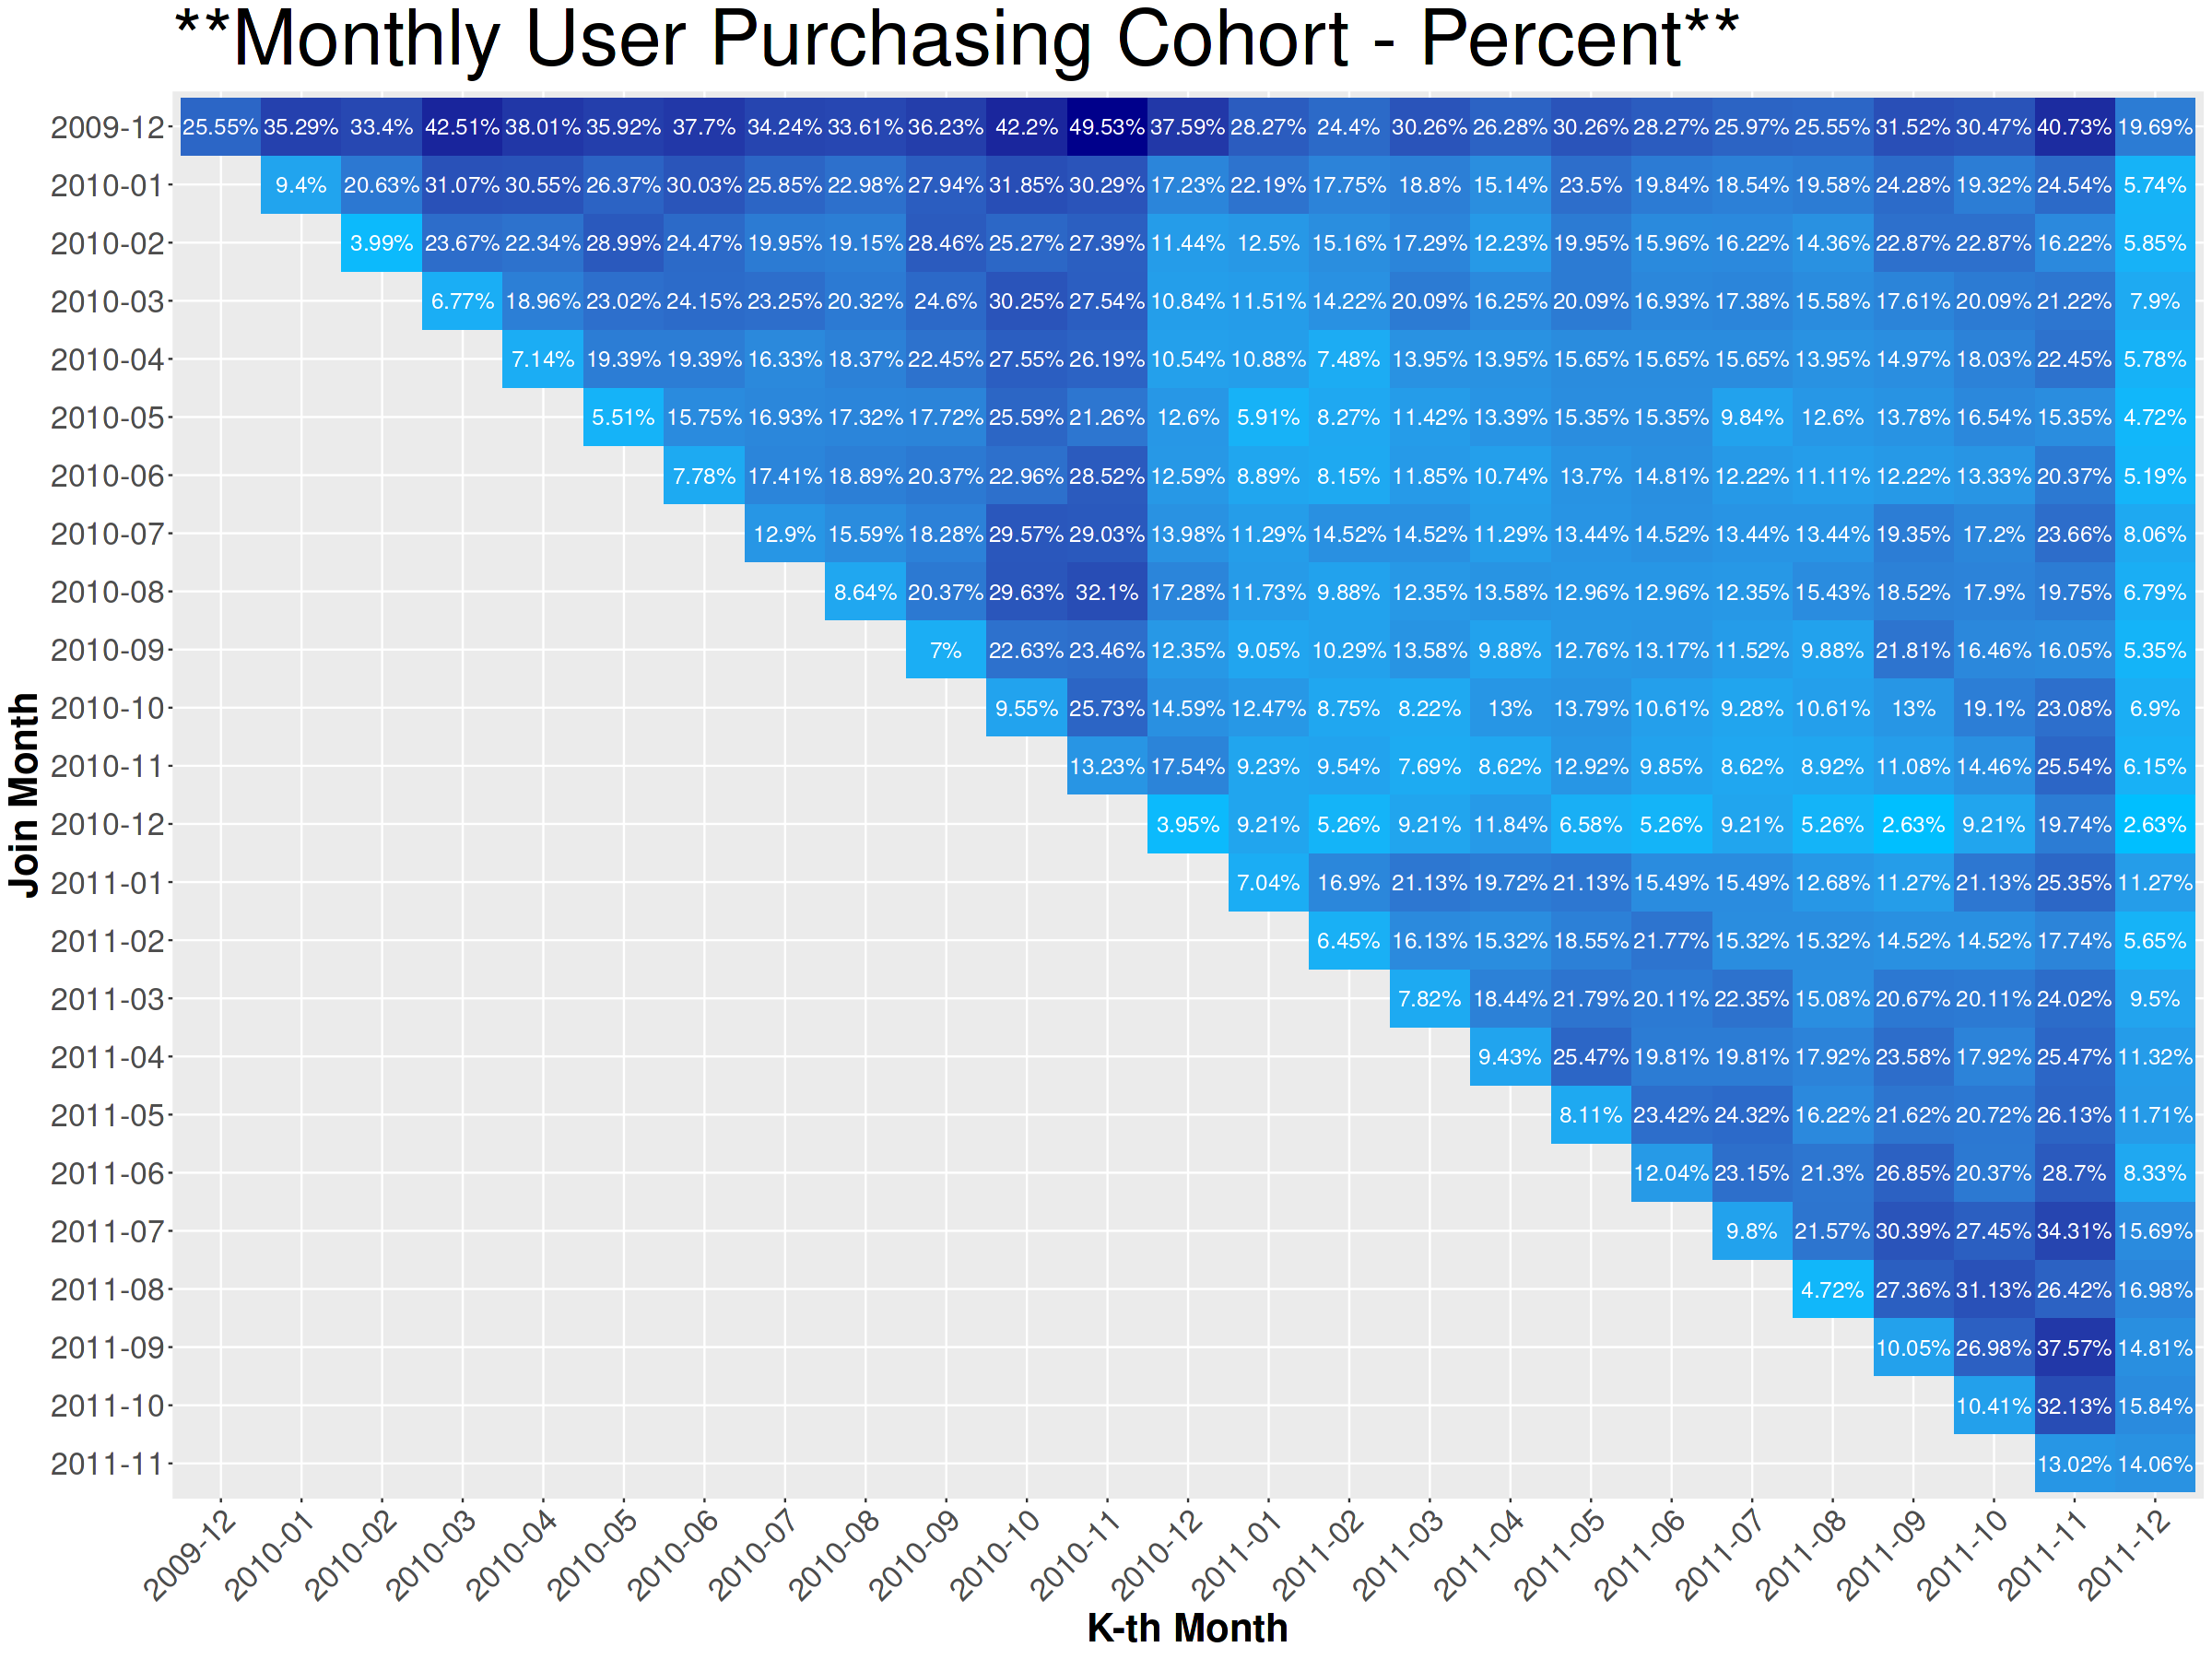

In [23]:
# plotting heatmap percent retention customer
plot_data=as.data.table(Full_Tbl_specialCol)
names(plot_data)[names(plot_data)=='CC']='Retention'

options(repr.plot.width = 20, repr.plot.height =15)

ggplot(plot_data) +
  geom_raster(aes(x = Invoice_YYYYMM,
                  y = reorder(joinMonthDate, desc(joinMonthDate)),
                 fill = Retention)) +
  scale_fill_continuous(guide = "none", type = "gradient",
                        low = "deepskyblue", high = "darkblue") +
  geom_text(aes(x = Invoice_YYYYMM,
                y = reorder(joinMonthDate, desc(joinMonthDate)),
                label = paste0(Retention,'%')), col = "white" , size=5)  +
  labs(
    title = "**Monthly User Purchasing Cohort - Percent**",
    x = "K-th Month",
    y = "Join Month"
  ) +
theme(axis.text=element_text(size=20),
        axis.title=element_text(size=25,face="bold")) +
theme(axis.text.x = element_text(angle = 45 , hjust = 1),
     plot.title = element_text(size=50))

* Count of retention customer

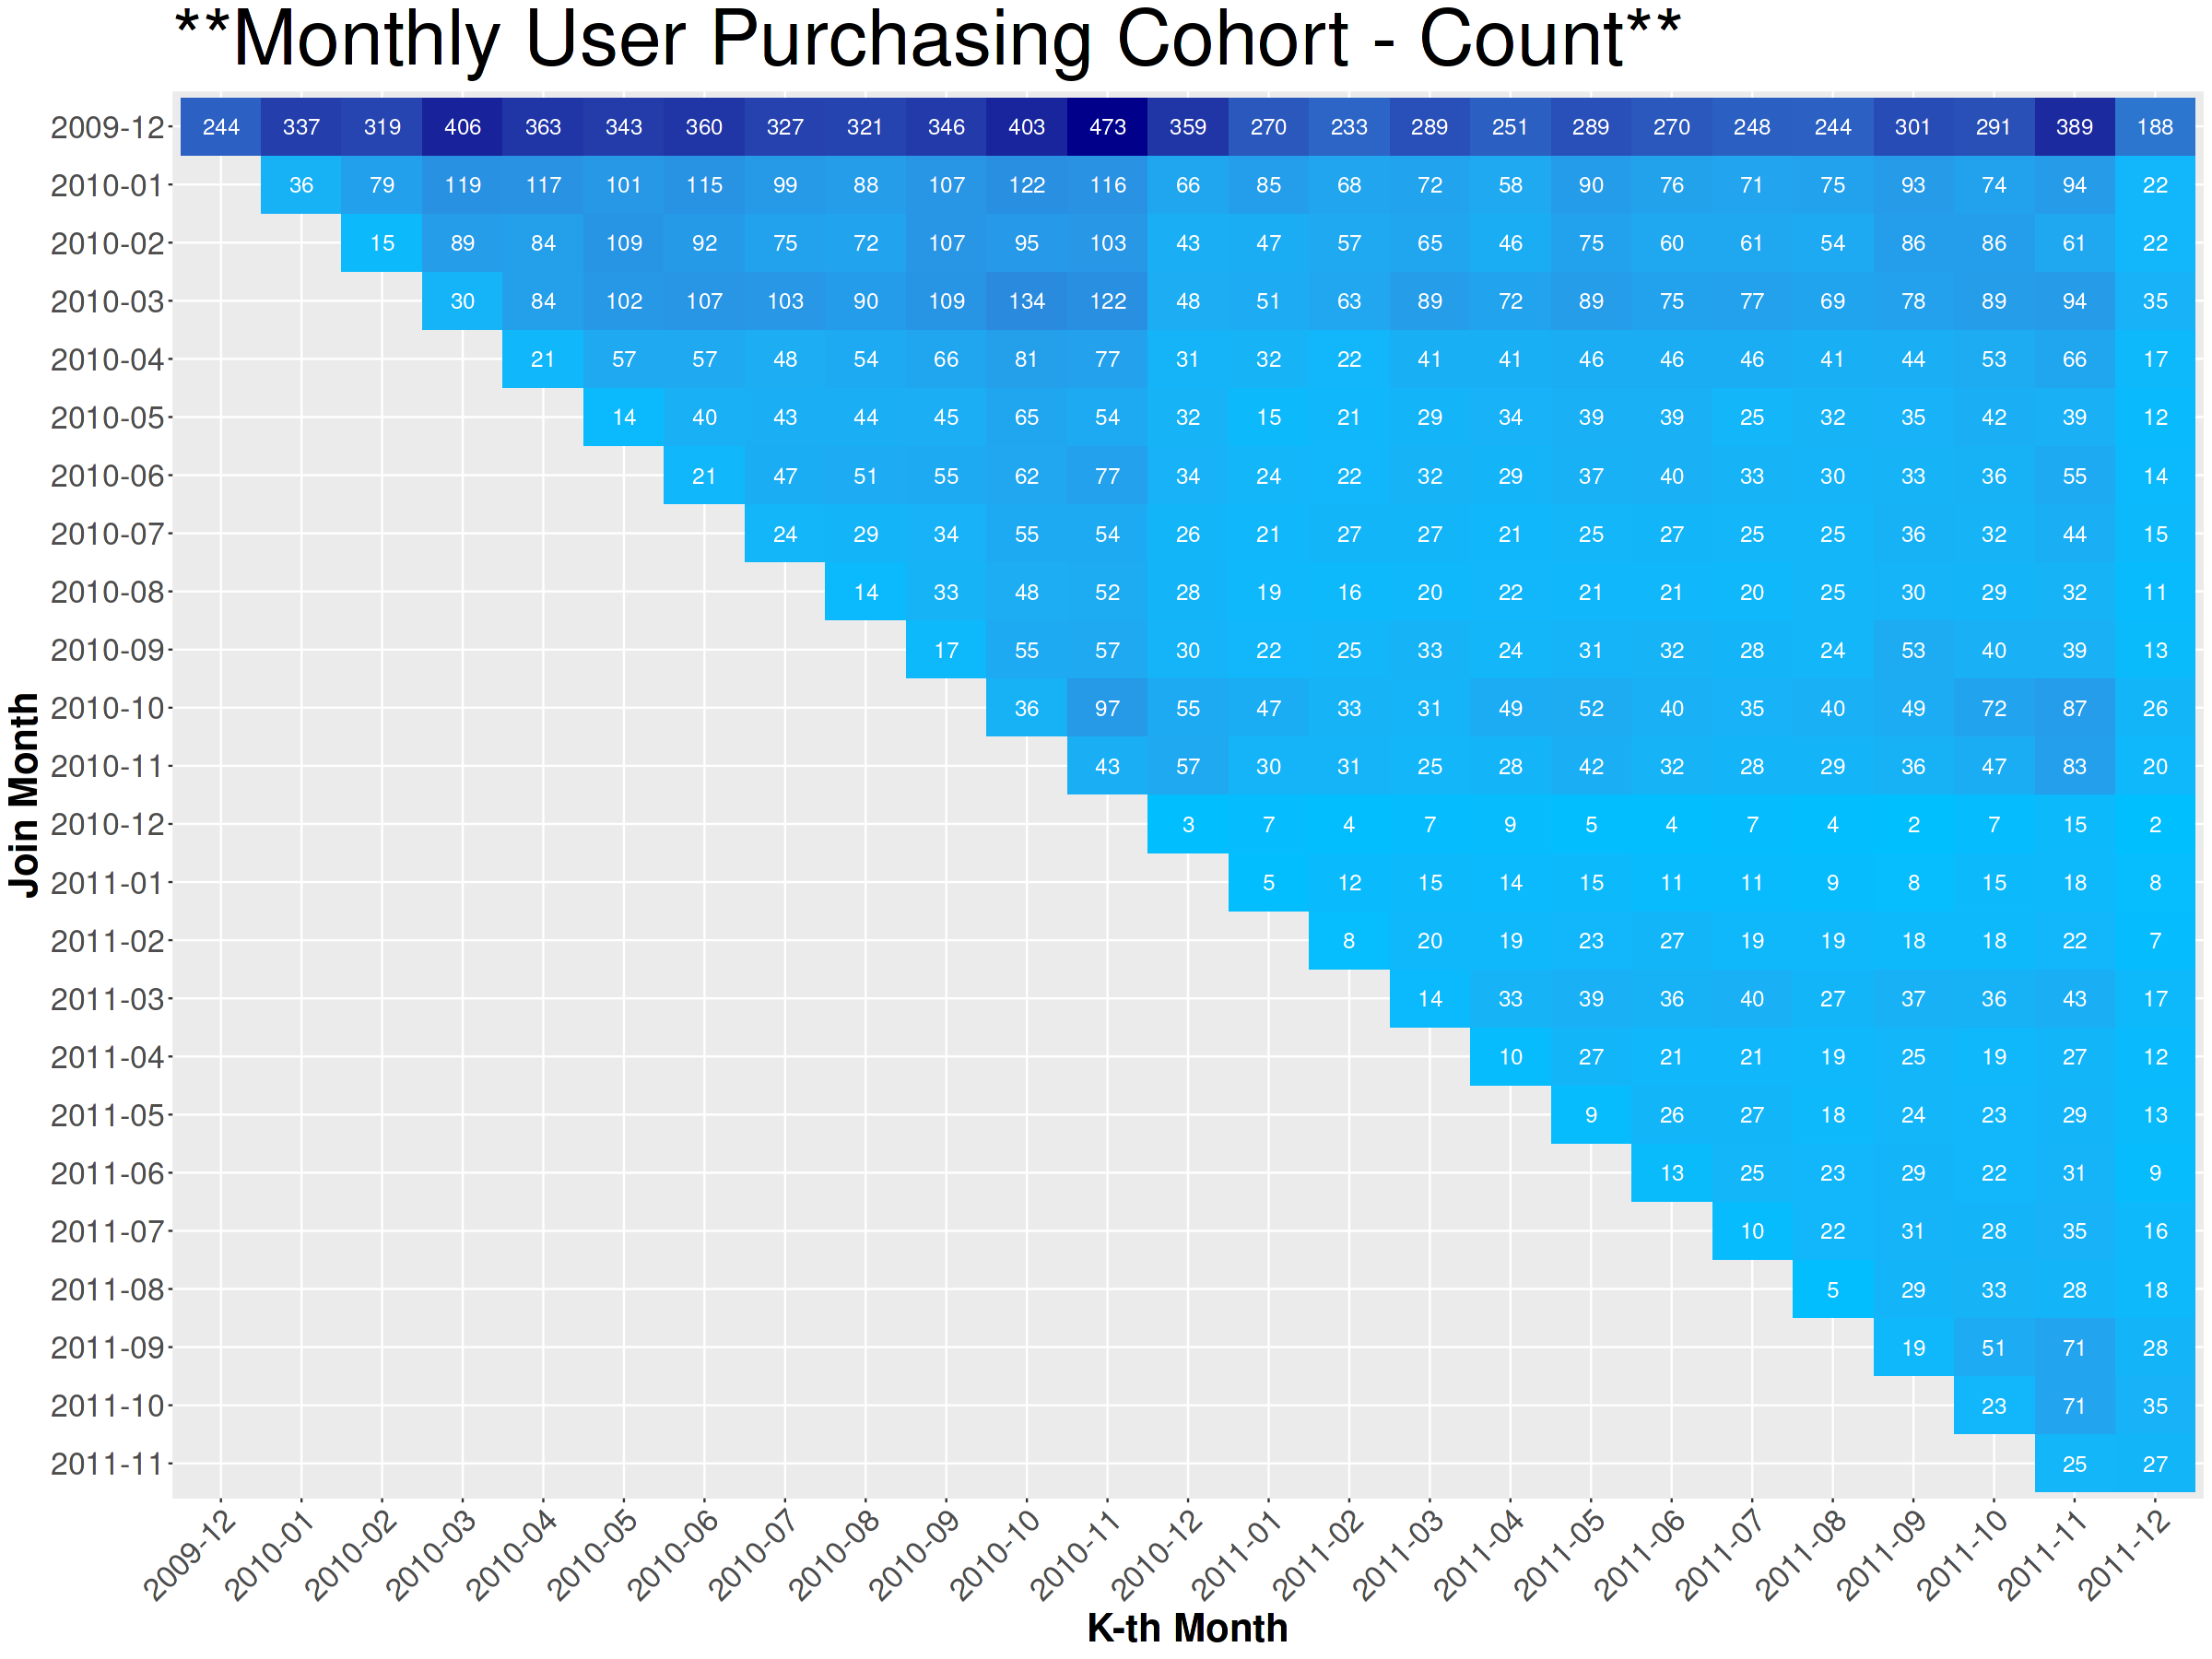

In [24]:
# plotting heatmap count of retention customer
plot_data_count=as.data.table(Full_Tbl4)
names(plot_data_count)[names(plot_data_count)=='Count_customer']='Retention'

options(repr.plot.width = 20, repr.plot.height =15)

ggplot(plot_data_count) +
  geom_raster(aes(x = Invoice_YYYYMM,
                  y = reorder(joinMonthDate, desc(joinMonthDate)),
                 fill = Retention)) +
  scale_fill_continuous(guide = "none", type = "gradient",
                        low = "deepskyblue", high = "darkblue") +
  geom_text(aes(x = Invoice_YYYYMM,
                y = reorder(joinMonthDate, desc(joinMonthDate)),
                label = Retention), col = "white" , size=5)  +
  labs(
    title = "**Monthly User Purchasing Cohort - Count**",
    x = "K-th Month",
    y = "Join Month"
  ) +
theme(axis.text=element_text(size=20),
        axis.title=element_text(size=25,face="bold") ) +
theme(axis.text.x = element_text(angle = 45 , hjust = 1),
     plot.title = element_text(size=50))